<a href="https://colab.research.google.com/github/moeed17/Audio_Transcriber/blob/main/Maryam_Trasncriber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jovian --upgrade
import jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Installing Transformer
!pip install -q transformers

In [3]:
# Import necessary libraries

# For managing audio file
import librosa

#Importing Pytorch
import torch

#Importing Wav2Vec tokenizer
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

import IPython.display as ipd
import librosa.display

import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
from scipy.io import wavfile

!pip install noisereduce
import noisereduce as nr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#cloning the repository to import audio samples
!git clone https://github.com/moeed17/Audio_Transcriber

fatal: destination path 'Audio_Transcriber' already exists and is not an empty directory.


In [5]:
# Reading taken audio clip
audio_data = '/content/Audio_Transcriber/WhatsApp Ptt 2023-04-15 at 7.29.44 PM.ogg'
Audio_Data,sr = librosa.load(audio_data, sr=16000)

In [6]:
#setting the style of background for audio signal
plt.style.use('seaborn-v0_8-dark')

In [7]:
'''
#plotting clean audio wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(Audio_Data, sr=sr, color="black")
plt.title("Waveplot of Audio Data")
plt.ylabel("Amplitude")
plt.grid()

'''

'\n#plotting clean audio wave\nplt.figure(figsize=(15, 5))\nlibrosa.display.waveshow(Audio_Data, sr=sr, color="black")\nplt.title("Waveplot of Audio Data")\nplt.ylabel("Amplitude")\nplt.grid()\n\n'

In [8]:
AudioSTFT = librosa.stft(Audio_Data)
Audio_Data_db = librosa.amplitude_to_db(abs(AudioSTFT))

In [9]:
# load data
Audio_Data,sr = librosa.load(audio_data, sr=16000)
# perform noise reduction
reduced_noise = nr.reduce_noise(y=Audio_Data, sr=sr)
wavfile.write("mywav_reduced_noise.wav", sr, reduced_noise)

In [10]:
ipd.Audio(audio_data, rate = sr)

In [11]:
ipd.Audio(reduced_noise, rate = 16000)

In [12]:
'''
#plotting filtered audio wave
plt.figure(figsize=(15, 5))
librosa.display.waveshow(filtered_data, sr=sr, color="black")
plt.title("Waveplot of Filtered Audio Data")
plt.ylabel("Amplitude")
plt.grid()
'''

'\n#plotting filtered audio wave\nplt.figure(figsize=(15, 5))\nlibrosa.display.waveshow(filtered_data, sr=sr, color="black")\nplt.title("Waveplot of Filtered Audio Data")\nplt.ylabel("Amplitude")\nplt.grid()\n'

In [13]:
FiltAudioSTFT = librosa.stft(reduced_noise)
FiltAudio_Data_db = librosa.amplitude_to_db(abs(FiltAudioSTFT))

'''
plt.figure(figsize=(15, 5))
librosa.display.specshow(FilteredAudio_Data_db, x_axis = 'time', y_axis= 'log', cmap='nipy_spectral')
plt.colorbar(label="Intensity (dB)")
plt.title('Spectrogram of Filtered Audio Wave');
'''

'\nplt.figure(figsize=(15, 5))\nlibrosa.display.specshow(FilteredAudio_Data_db, x_axis = \'time\', y_axis= \'log\', cmap=\'nipy_spectral\')\nplt.colorbar(label="Intensity (dB)")\nplt.title(\'Spectrogram of Filtered Audio Wave\');\n'

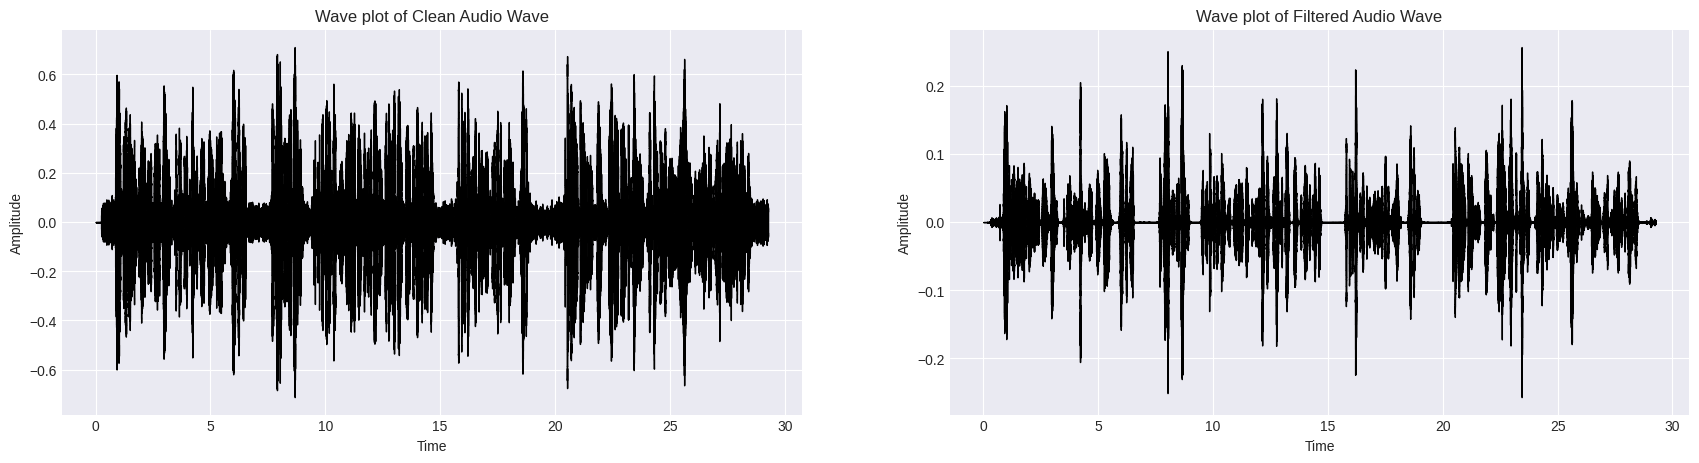

In [14]:
fig, ax =  plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(21,5))

librosa.display.waveshow(Audio_Data, sr=sr, color="black", ax=ax[0])
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Wave plot of Clean Audio Wave')
ax[0].grid()

librosa.display.waveshow(reduced_noise, sr=sr, color="black", ax=ax[1])
ax[1].set_title('Wave plot of Filtered Audio Wave')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

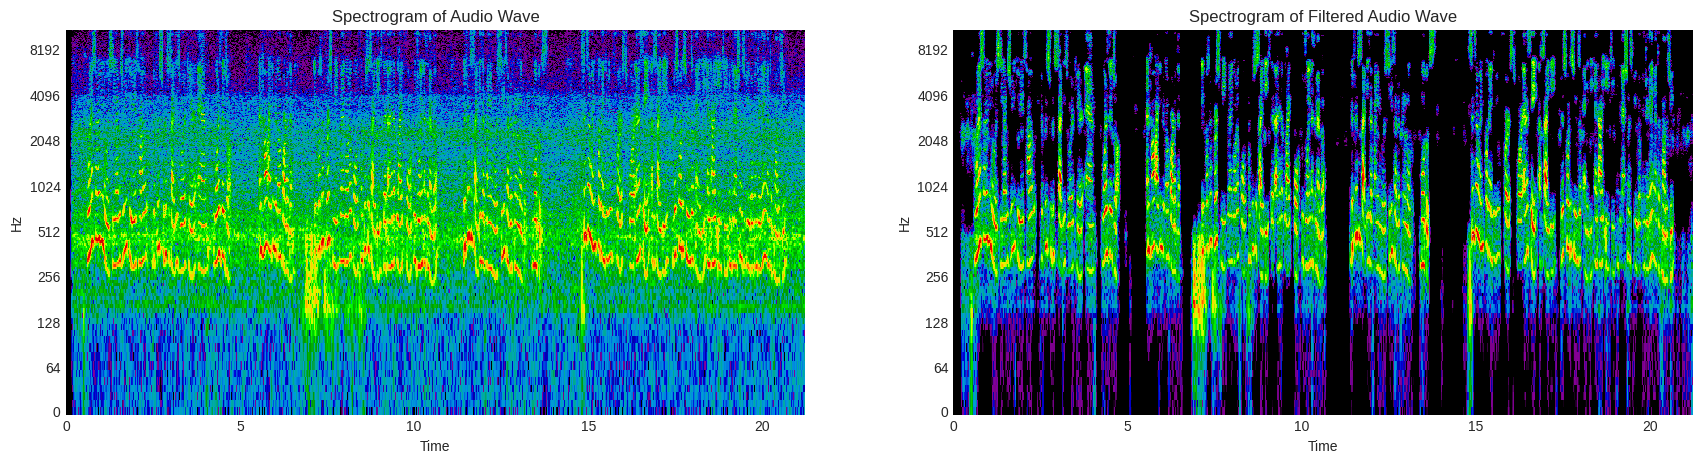

In [15]:
fig, ax =  plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(21,5))

librosa.display.specshow(Audio_Data_db, x_axis='time', y_axis='log', ax=ax[0], cmap='nipy_spectral')
ax[0].set_title('Spectrogram of Audio Wave')

librosa.display.specshow(FiltAudio_Data_db, x_axis='time', y_axis='log', ax=ax[1], cmap='nipy_spectral')
ax[1].set_title('Spectrogram of Filtered Audio Wave');

In [16]:
# Importing Wav2Vec pretrained model

tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.9/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:757: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
# Taking an input value

input_values = tokenizer(reduced_noise, return_tensors = "pt").input_values

# Storing logits (non-normalized prediction values)
logits = model(input_values).logits

# Storing predicted id's
prediction = torch.argmax(logits, dim = -1)

In [18]:
# Passing the prediction to the tokenzer decode to get the transcription
transcription = tokenizer.batch_decode(prediction)[0]
print(transcription)

WHEN I STARTED UNIVERSITY I WAS VEARLY CURIOUS HOW DIFFERENT STUDENT SOCIETIES WOR HERE AND WHAT IS THEIR JOB AND HOW I CAN BECOME A PART OF THEM IT WAS MY FIRST WEEK WHEN I GOT A CALL FROM TWO SOCIETIES THAT I HAD APPLIED FOR TO JOIN AS A MEMBER DIFFERENT SOCIETIES AT MY UNIVERSITIES HAVE DIFFERENT MOTO MOTIS SINCE I WENT FOR THE INTERVIEW FIRST FOR N S A A SOCIETY JUST WHERE THE STUDENTS OF ENIDY AND I A T INTHERNATIONALISTIPUDE OF ENGERNEERING ANTHROPNOLOGY
